<a href="https://colab.research.google.com/github/jianfeiZhao/Supply-Chain-Analysis/blob/master/Supply_Chain2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('./SupplyChain.csv', encoding='unicode_escape')
dataset.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [32]:
# 补全缺失值
dataset['Customer Zipcode'].value_counts()
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)
dataset['Customer Zipcode'].isnull().sum()

0

In [33]:
# 查看交易方式
#dataset['Type'].unique()
dataset['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

In [34]:
# 划分不同支付类型
pay_type1 = dataset[dataset['Type'] == 'DEBIT']
pay_type2 = dataset[dataset['Type'] == 'TRANSFER']
pay_type3 = dataset[dataset['Type'] == 'PAYMENT']
pay_type4 = dataset[dataset['Type'] == 'CASH']
# 不同支付类型按地区划分
count1 = pay_type1['Order Region'].value_counts()
count2 = pay_type2['Order Region'].value_counts()
count3 = pay_type3['Order Region'].value_counts()
count4 = pay_type4['Order Region'].value_counts()

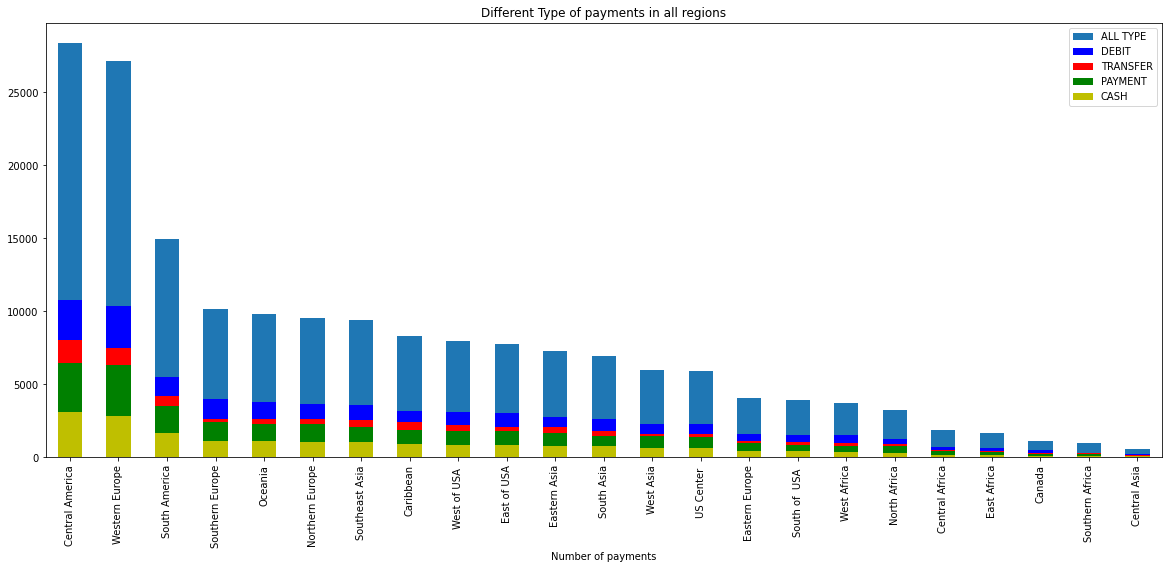

In [41]:
fig, ax = plt.subplots(figsize=(20,8))

dataset['Order Region'].value_counts().plot.bar(label='ALL TYPE')
count1.plot.bar(color='b', label='DEBIT')
count2.plot.bar(color='r', label='TRANSFER')
count3.plot.bar(color='g', label='PAYMENT')
count4.plot.bar(color='y', label='CASH')
plt.xlabel('Order Regions')
plt.xlabel('Number of payments')
plt.title('Different Type of payments in all regions')
plt.legend()
plt.show()

In [36]:
# 对负收益的产品进行探索
loss = dataset[dataset['Order Profit Per Order'] < 0]
loss['Order Profit Per Order'].sum()  # 亏损总额

-3883547.345768667

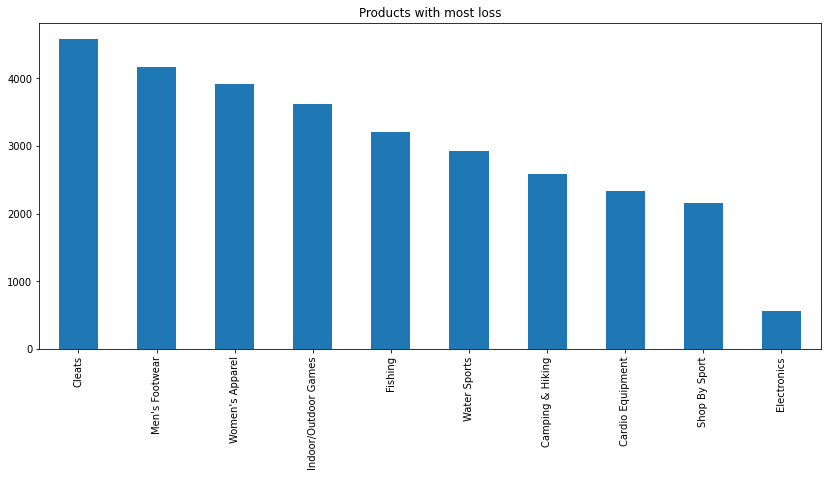

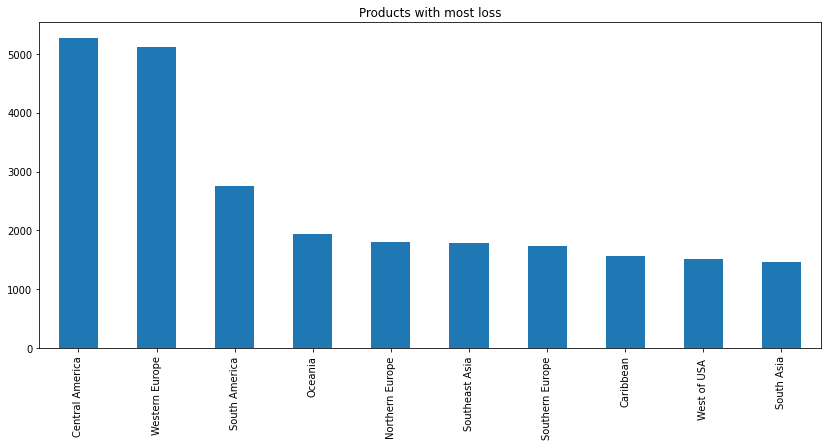

In [37]:
# 最大负收益订单数Top 10 Category Name
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(14,6), title='Products with most loss')
plt.show()
# 负收益地区Top 10
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(14,6), title='Products with most loss')
plt.show()

In [38]:
# 负收益可能是欺诈交易，会采用哪种支付方式？
dataset['Order Status'].value_counts()
xyz = dataset[dataset['Order Status'] == 'SUSPECTED_FRAUD']
print('欺诈交易的支付方式：', xyz['Type'].value_counts())
print('总的负收益：', loss['Benefit per order'].sum())
print('欺诈订单的负收益：', xyz[xyz['Benefit per order']<0]['Benefit per order'].sum())

欺诈交易的支付方式： TRANSFER    4062
Name: Type, dtype: int64
总的负收益： -3883547.345768667
欺诈订单的负收益： -90182.98003954


TRANSFER支付方式最容易导致欺诈交易

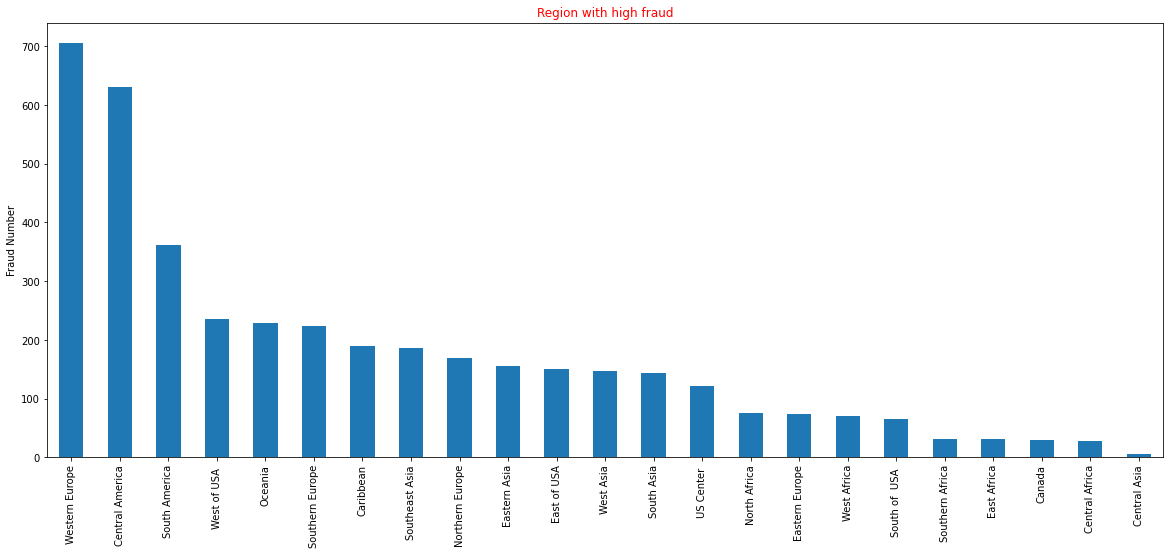

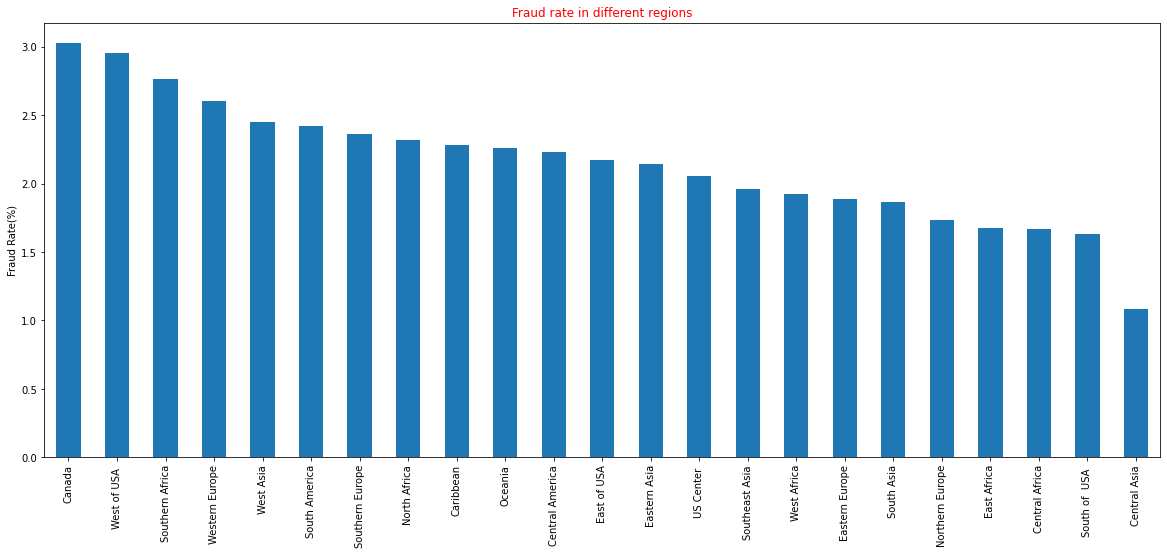

In [39]:
xyz['Order Region'].value_counts().plot.bar(figsize=(20,8))
plt.title('Region with high fraud', color='r')
plt.ylabel('Fraud Number')
plt.show()
fraud_rate = xyz['Order Region'].value_counts()/dataset['Order Region'].value_counts()*100
fraud_rate.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.title('Fraud rate in different regions', color='r')
plt.ylabel('Fraud Rate(%)')
plt.show()

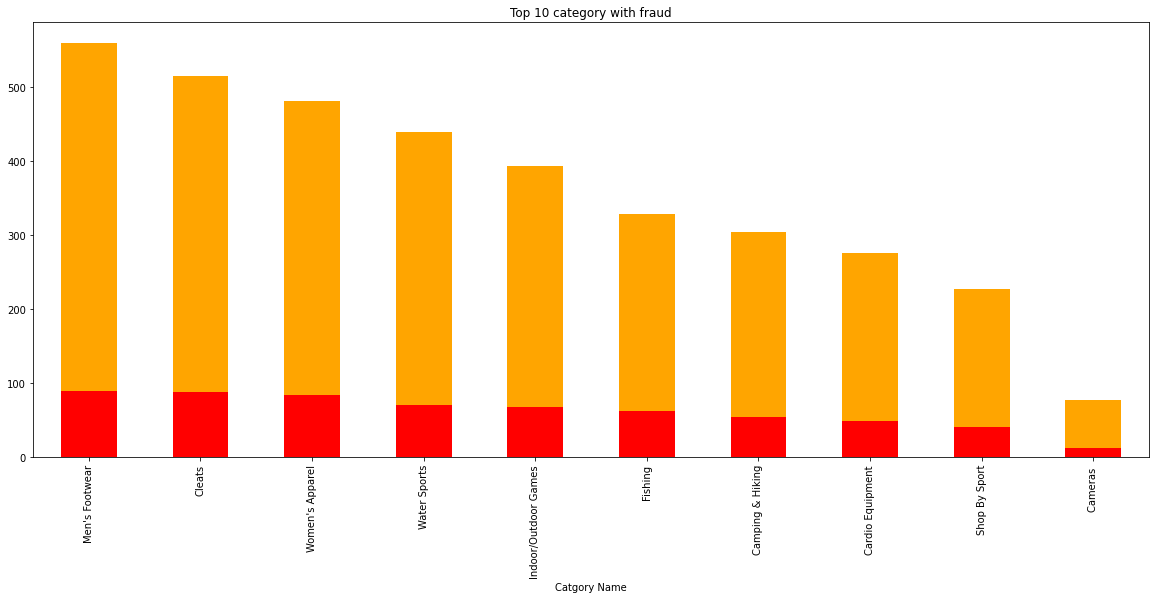

In [40]:
WE_fraud = xyz[xyz['Order Region'] == 'Western Europe']
fraud_cat = xyz['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), label='All regions', color='orange')
WE_fraud_cat = WE_fraud['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), label='Western Europe', color='red')
plt.title('Top 10 category with fraud')
plt.xlabel('Catgory Name')
plt.show()

In [43]:
# 筛选Top10风险最高的Customer
xyz['Customer Fullname'] = xyz['Customer Fname']+xyz['Customer Lname']
print(xyz['Customer Fullname'].value_counts().nlargest(10))

MarySmith        528
RobertSmith       28
JamesSmith        23
DavidSmith        20
JonathanSmith     18
HenrySmith        16
DanielSmith       15
MaryTorres        15
MaryJones         14
SusanSmith        13
Name: Customer Fullname, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MarySmith, 姓氏为Smith 欺诈行为最多。

In [45]:
# MarySmith怀疑欺诈总交易金额
xyz[xyz['Customer Fullname'] == 'MarySmith']['Sales'].sum()

102491.66191043999

In [46]:
import pickle
with open('data.pkl','wb') as file:
  pickle.dump(dataset, file)